# Data Access

In [2]:
# Single import for everything you need
from src.notebook_setup import *
from src.preprocessing.data_preprocessor import *


# Initialize everything and get your database connection
# mimicdf = setup()
# ed_data = mimicdf.ed_data()

ed_data = pd.read_csv('../data/cached/ed_data.csv')

## Data Quality Assessment

In [3]:

# # Basic Statistics
# ed_data.describe().T


# Create a summary DataFrame
summary_df = pd.DataFrame(index=ed_data.columns)

# Calculate mean for each column
summary_df['mean'] = ed_data.mean(numeric_only=True)

# Calculate standard deviation for each column
summary_df['std'] = ed_data.std(numeric_only=True)

# Calculate percentage of missing values for each column
summary_df['missingness'] = ed_data.isna().mean()

# Display the summary DataFrame
summary_df

,mean,std,missingness
subject_id,1.500871e+07,2.878486e+06,0.000000
stay_id,3.499735e+07,2.888342e+06,0.000000
gender,NaN,NaN,0.000000
arrival_transport,NaN,NaN,0.000000
disposition,NaN,NaN,0.000000
race,NaN,NaN,0.000000
age_at_ed,5.286284e+01,2.061934e+01,0.000000
dow,NaN,NaN,0.000000
hour,1.347827e+01,5.890293e+00,0.000000
minute,2.941584e+01,1.730100e+01,0.000000


## Missingness Analysis

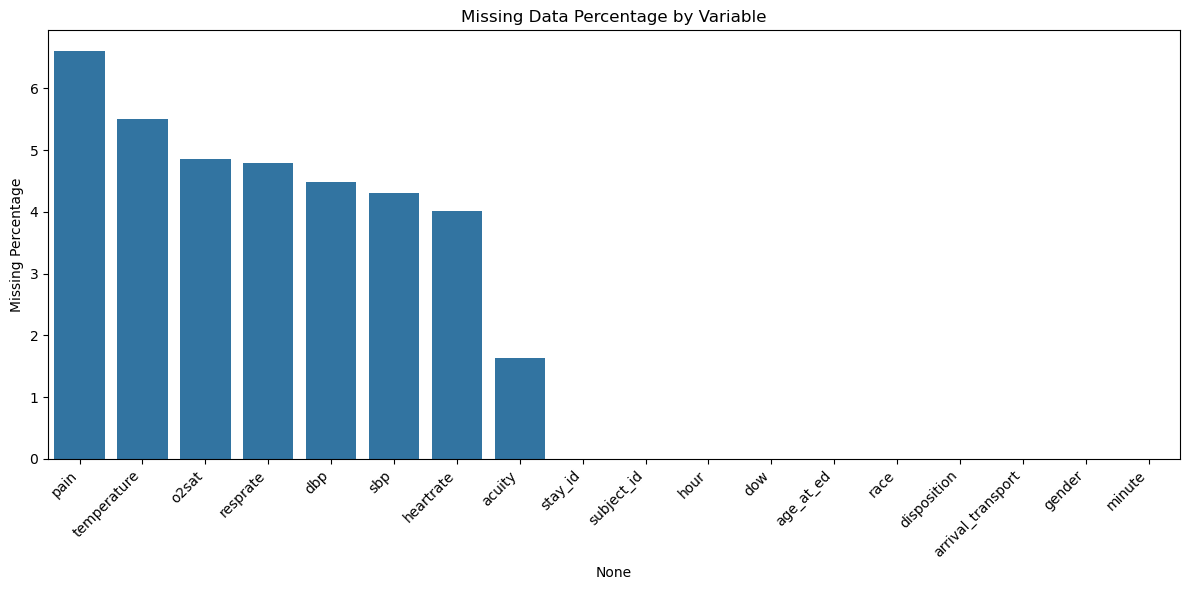

In [26]:
# First explore the data
explorer = DataExplorer(ed_data)
missing_summary = explorer.summarize_missing_data()



Visualization Caption:
Heatmap showing correlations between missing values across features.



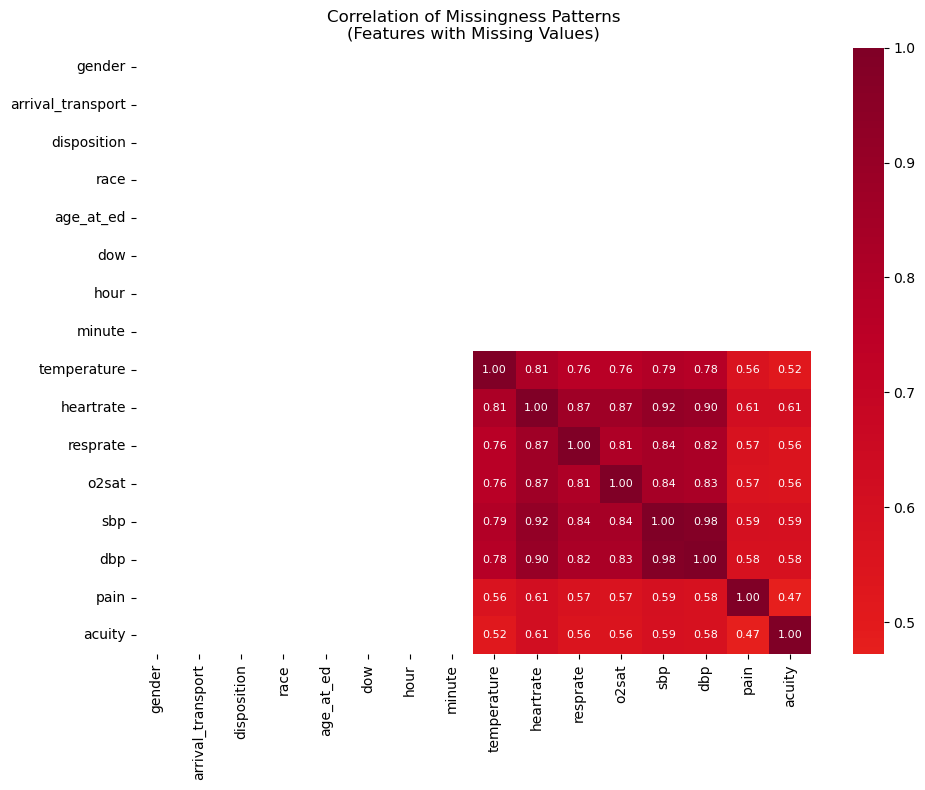

,gender,arrival_transport,disposition,race,age_at_ed,dow,hour,minute,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disposition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_at_ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.812876,0.763528,0.762822,0.792274,0.781235,0.564851,0.521633
heartrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812876,1.000000,0.870994,0.872918,0.917976,0.901493,0.610935,0.614300


In [27]:
missingness_correlation_matrix = explorer.analyze_missing_correlations()
missingness_correlation_matrix

Strong correlations in vital sign missingness (0.76-0.98) suggest these measurements are typically recorded together during patient assessment. Demographic/administrative data (gender, race, time) show no missing value patterns (NaN), indicating complete recording. Pain and acuity show moderate correlation (0.47-0.61) with vital signs, suggesting somewhat independent collection processes.


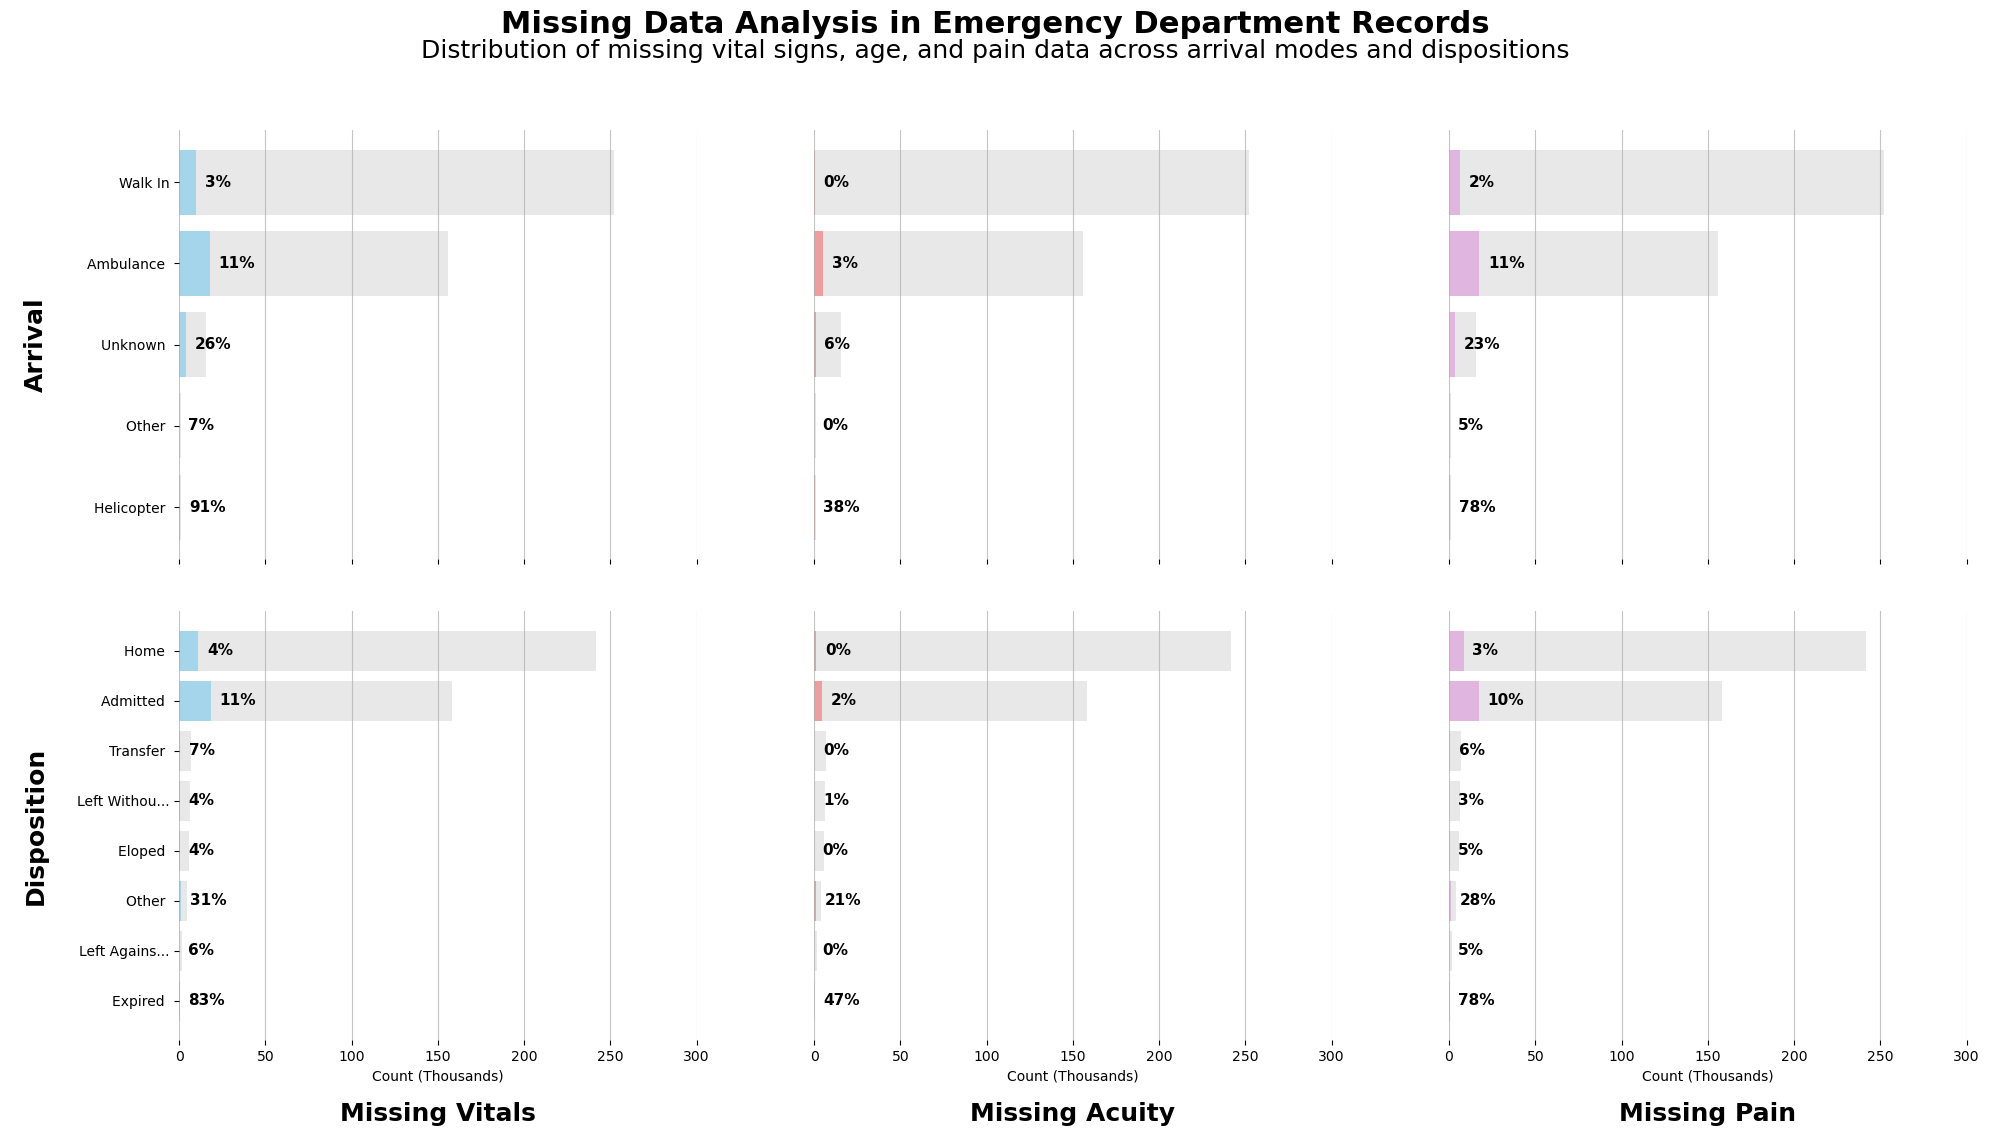

In [28]:
explorer = DataExplorer(ed_data)
explorer.plot_missingness_distribution()

The missingness visualization reveals clear patterns in data quality:
Standard encounters (Walk-in/Ambulance arrivals → Home/Admitted dispositions) show acceptable missingness rates (2-11%), while atypical cases (helicopter arrivals, expired patients) show extreme missingness (40-90%).

Given these patterns and that atypical encounters represent a small fraction of total cases, we will restrict analysis to:
Arrivals: WALK IN, AMBULANCE
Dispositions: HOME, ADMITTED

This approach prioritizes data quality and focuses on typical ED pathways, though introduces some selection bias by excluding edge cases.

In [29]:
# explorer.plot_features_distribution(ed_data)

## Data Preprocessing

In [30]:
# Preprocess ed_data to handle invlaid values
cleaner = DataCleaner(ed_data)
cleaned_data = cleaner.prepare_data()

# explorer.plot_features_distribution(cleaned_data)
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,425087.0,1.500871e+07,2.878486e+06,10000032.0,12517890.5,15016278.0,17499003.5,19999987.0
stay_id,425087.0,3.499735e+07,2.888342e+06,30000012.0,32497991.5,34993947.0,37503868.5,39999965.0
age_at_ed,425087.0,5.286284e+01,2.061934e+01,18.0,35.0,53.0,69.0,103.0
hour,425087.0,1.347827e+01,5.890293e+00,0.0,10.0,14.0,18.0,23.0
minute,425087.0,2.941584e+01,1.730100e+01,0.0,14.0,29.0,44.0,59.0
temperature,401186.0,9.808233e+01,1.009903e+00,56.0,97.5,98.0,98.6,111.4
heartrate,407980.0,8.506642e+01,1.766277e+01,13.0,72.0,84.0,96.0,250.0
resprate,404709.0,1.754632e+01,2.356467e+00,1.0,16.0,18.0,18.0,97.0
o2sat,404352.0,9.839522e+01,2.061225e+00,50.0,97.0,99.0,100.0,100.0
sbp,405409.0,1.349853e+02,2.229341e+01,10.0,120.0,133.0,148.0,299.0


In [31]:
# explorer.plot_features_distribution(cleaned_data)

## Feature Engineering

In [32]:
feature_engineer = FeatureEngineer(cleaned_data)
cleaned_data = feature_engineer.engineer_features()

for set, features in feature_engineer.features.items():
    print(f'Feature set: {set}')
    for feature in features:
        print(f'  - {feature}')
    print()

Feature set: original_numerical
  - age_at_ed
  - temperature
  - heartrate
  - resprate
  - o2sat
  - sbp
  - dbp
  - pain
  - acuity

Feature set: original_categorical
  - gender
  - arrival_transport
  - disposition
  - race
  - dow

Feature set: original_temporal
  - hour
  - minute

Feature set: derived_numerical
  - map
  - pulse_pressure
  - shock_index
  - rate_pressure_product
  - temp_delta
  - week_minutes
  - day_minutes

Feature set: derived_binary
  - is_tachycardic
  - is_bradycardic
  - is_hypoxic
  - is_hypertensive
  - is_hypotensive
  - is_febrile
  - is_hypothermic
  - has_sirs
  - is_daytime

Feature set: derived_categorical
  - hr_category
  - resp_category
  - o2_category
  - sbp_category
  - dbp_category
  - temp_category
  - pain_category
  - age_group
  - acuity_group

Feature set: box_transformed
  - temperature_beta
  - o2sat_ibx
  - shock_index_bx
  - rate_pressure_product_bx
  - resprate_bx
  - pain_bx

Feature set: cyclical_features
  - week_minutes_sin
 

## Data Transformation

In [33]:
numerical_features = [
            'age_at_ed', 'temperature', 'temp_delta', 'heartrate',
            'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'map',
            'pulse_pressure', 'shock_index', 'rate_pressure_product'
        ]

print('QQ plot prior to transformation')
# explorer.plot_qq_plot(cleaned_data.dropna(), numerical_features)



QQ plot prior to transformation


QQ plot after robust transformation


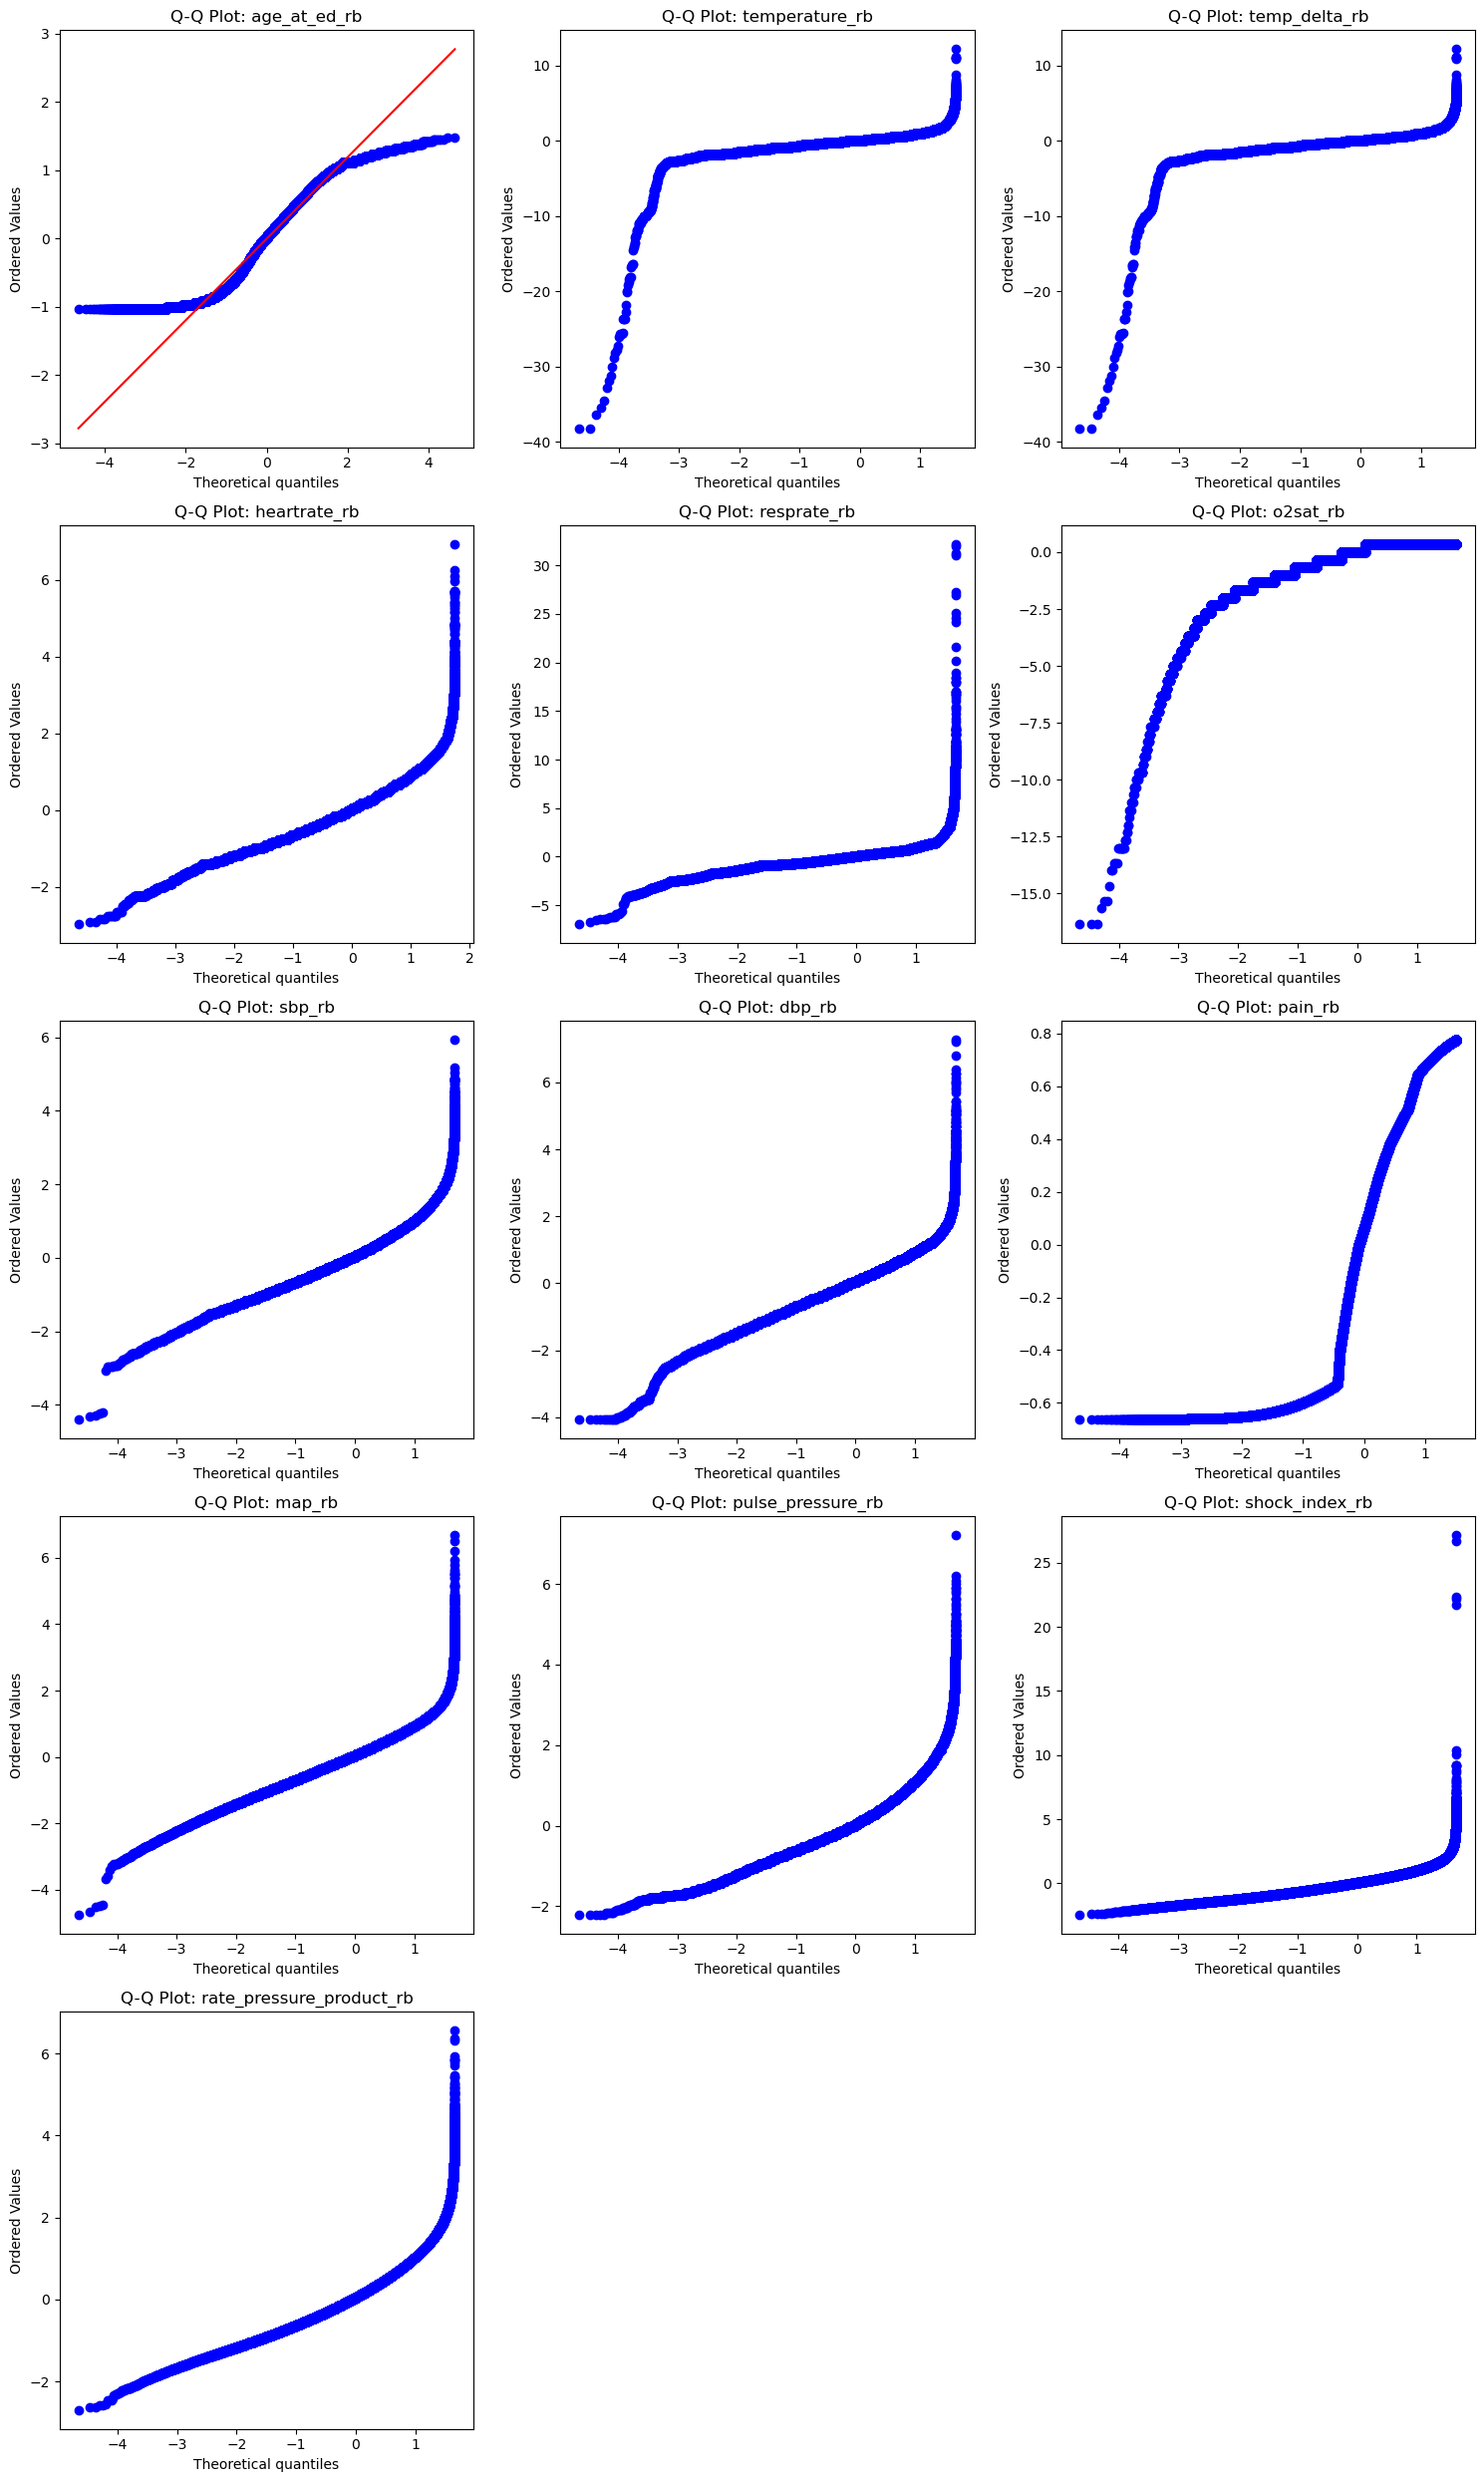

In [34]:
robust_transformer = DataTransformer(cleaned_data)
robust_gmm_data, robust_gmm_features = robust_transformer.robust_transformer_fit()

print('QQ plot after robust transformation')
explorer.plot_qq_plot(robust_gmm_data, robust_gmm_features)

QQ plot after transformation


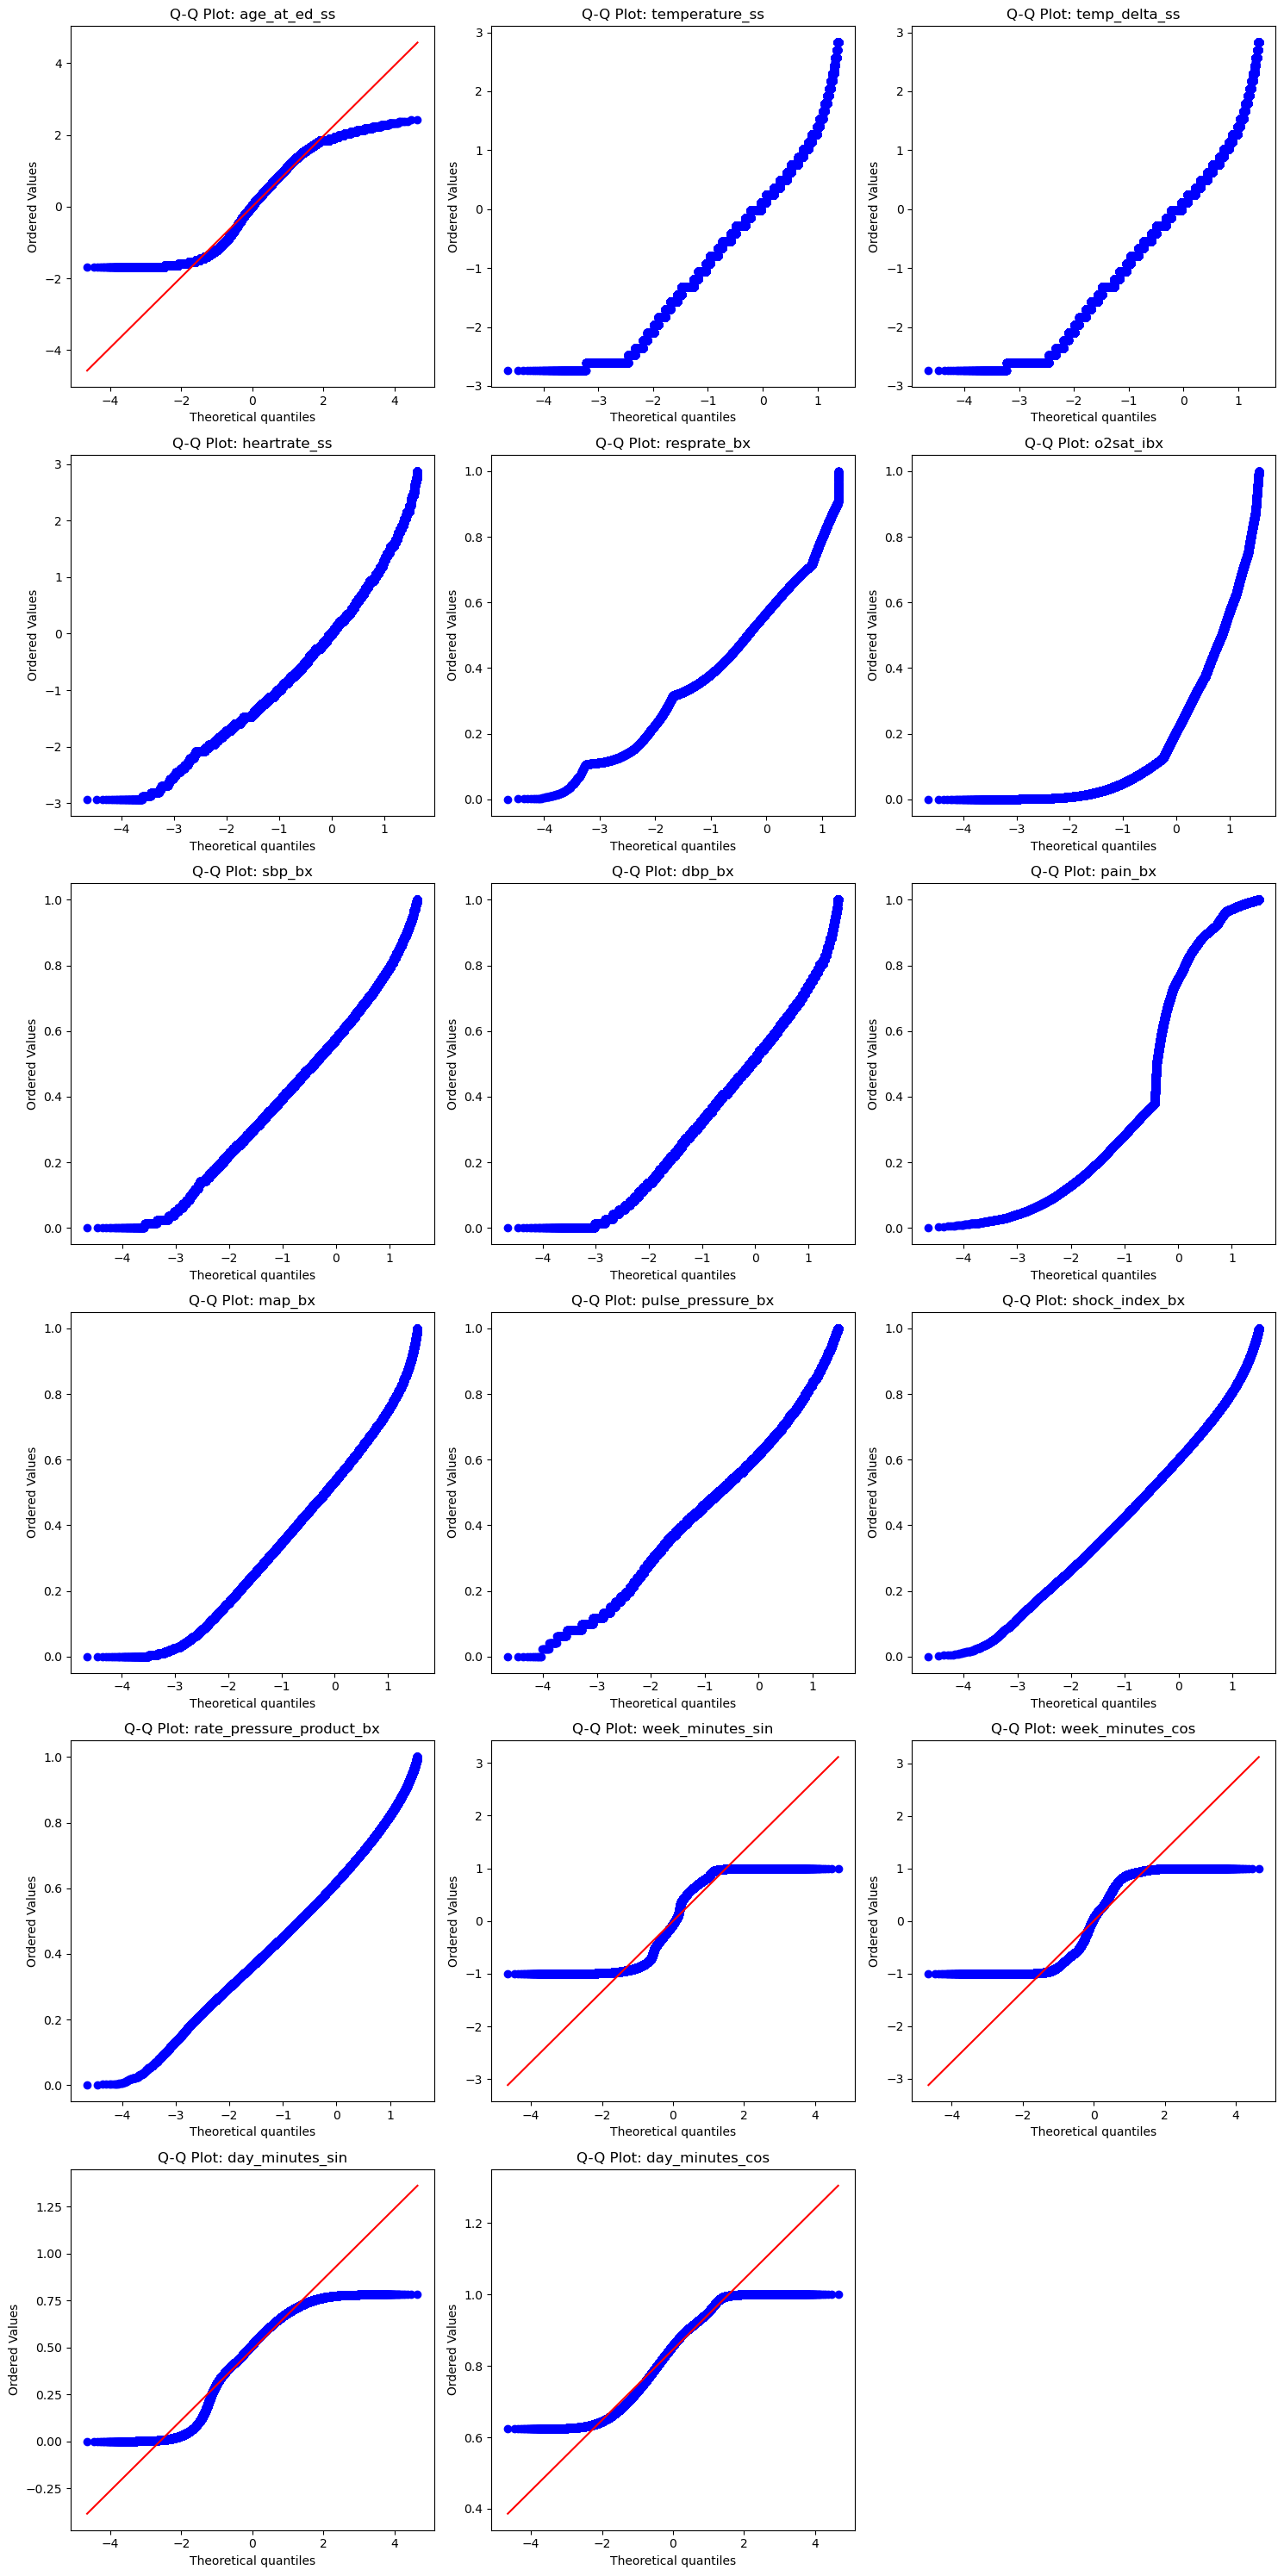

In [35]:
aggressive_transformer = DataTransformer(cleaned_data)
aggressive_gmm_data, aggressive_gmm_features = aggressive_transformer.aggressive_transformer_fit()

print('QQ plot after transformation')
explorer.plot_qq_plot(aggressive_gmm_data, aggressive_gmm_features)




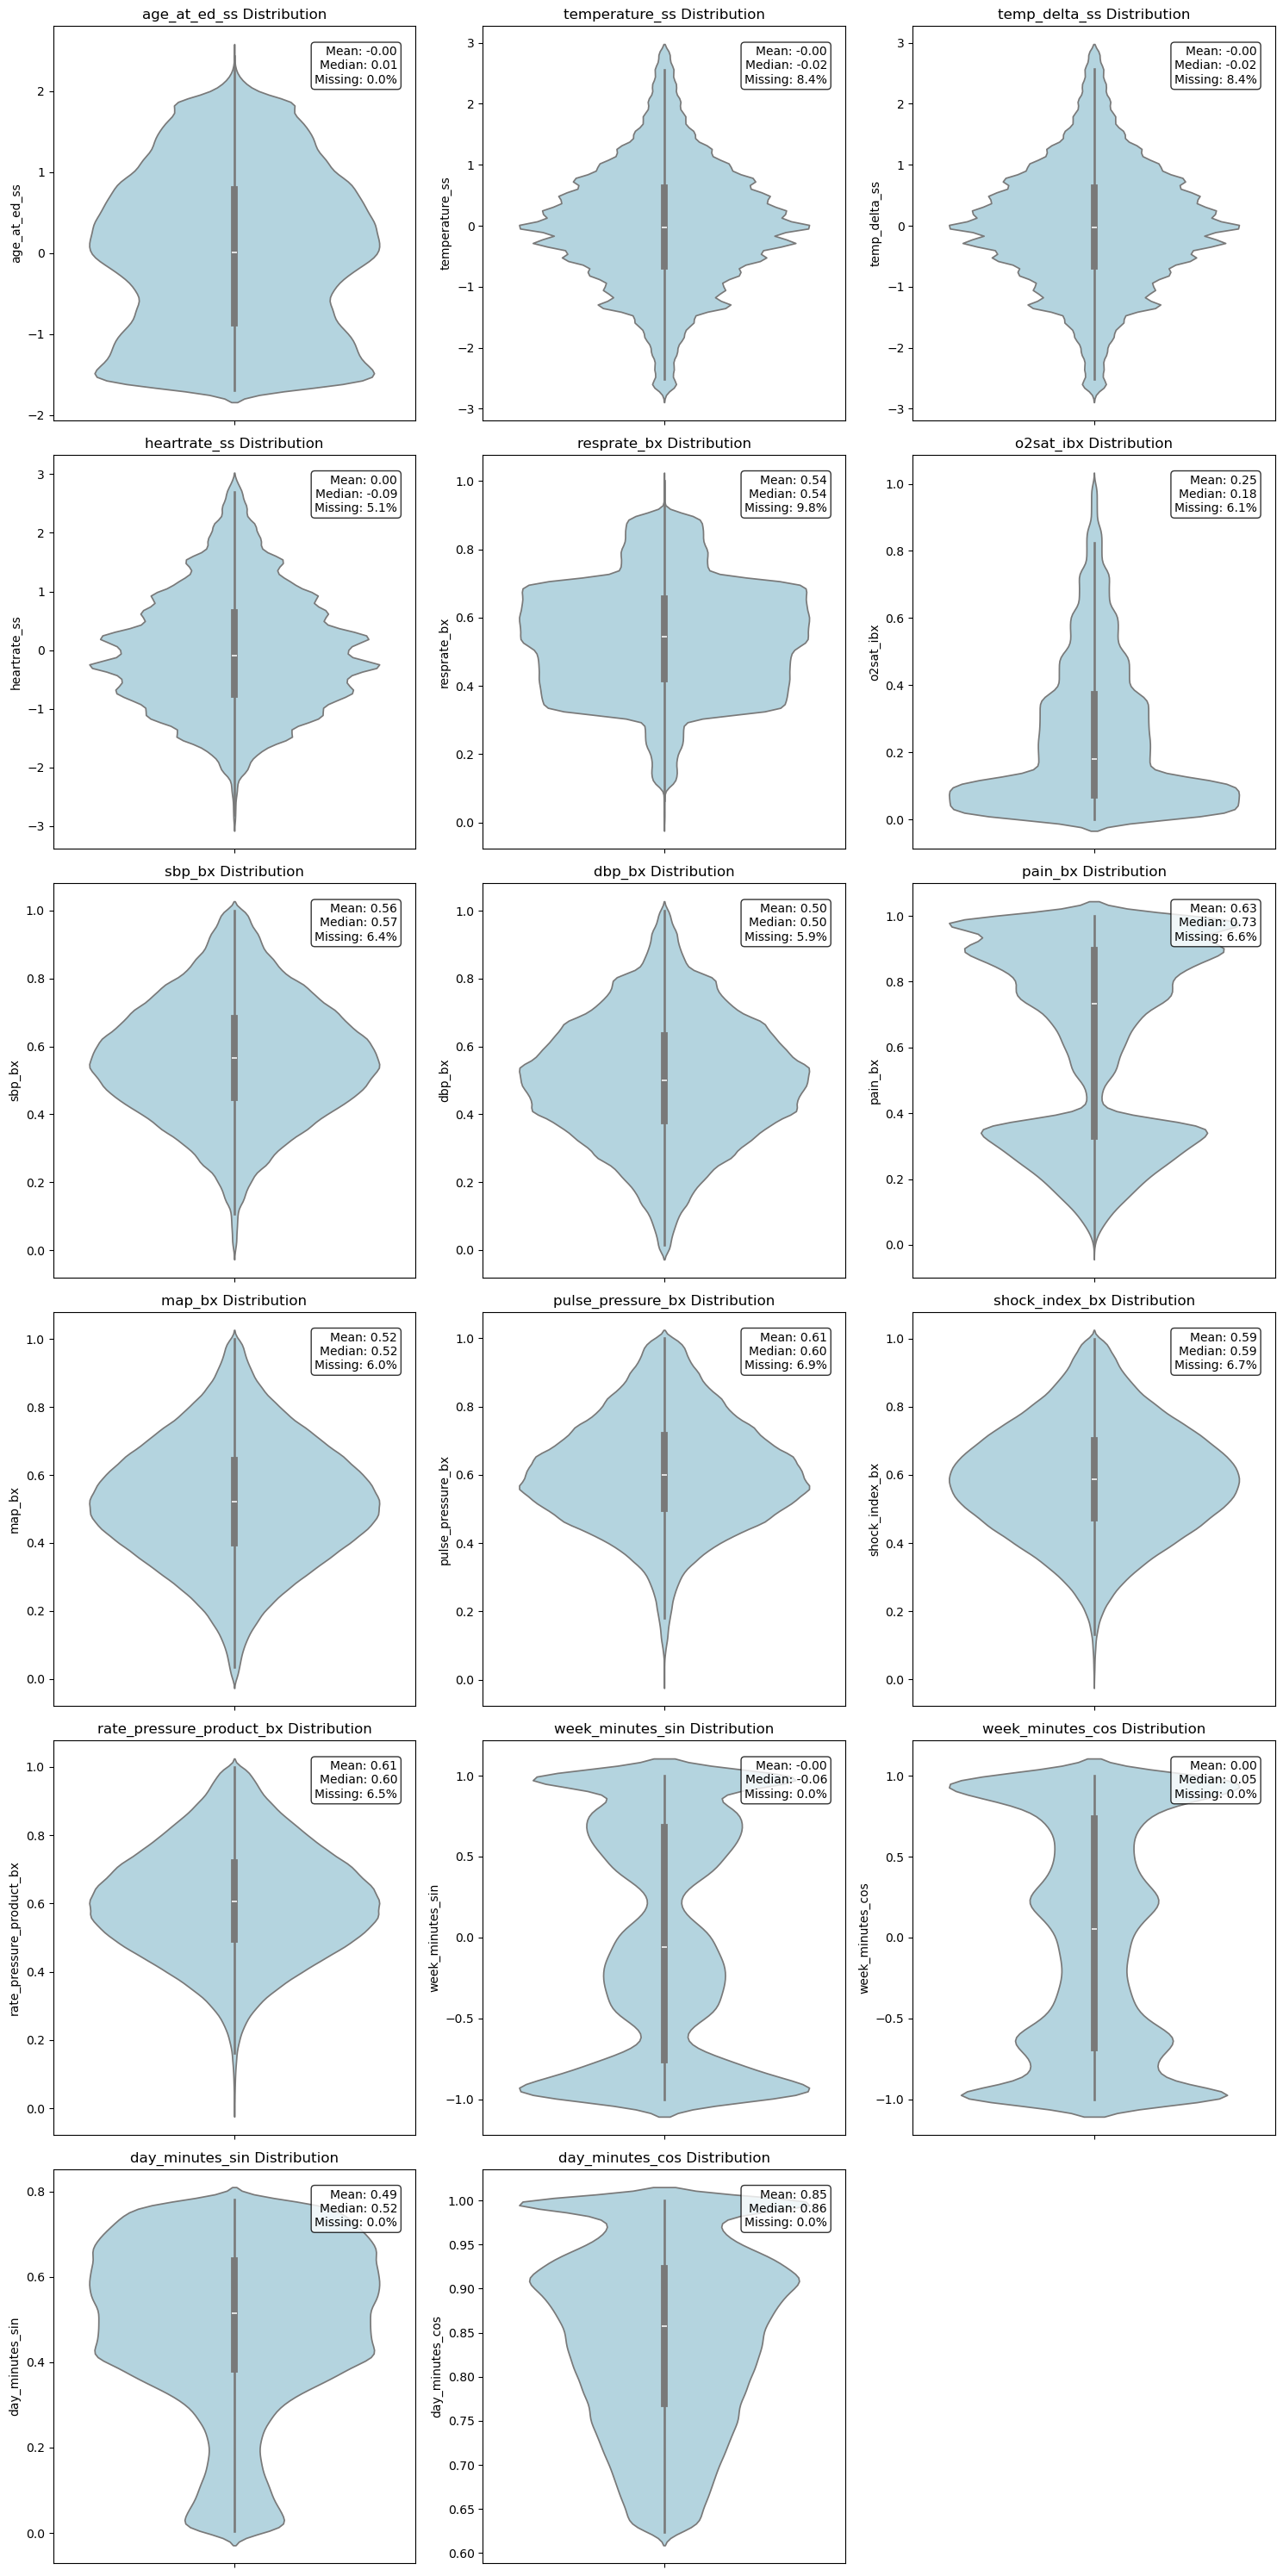

,count,mean,std,min,25%,50%,75%,max,null_ratio
subject_id,425087.0,15008713.591347,2878486.35271,10000032.0,12517890.5,15016278.0,17499003.5,19999987.0,0.000000
stay_id,425087.0,34997352.518205,2888341.541656,30000012.0,32497991.5,34993947.0,37503868.5,39999965.0,0.000000
age_at_ed,425087.0,52.862845,20.619338,18.0,35.0,53.0,69.0,103.0,0.000000
hour,425087.0,13.478267,5.890293,0.0,10.0,14.0,18.0,23.0,0.000000
minute,425087.0,29.415837,17.301001,0.0,14.0,29.0,44.0,59.0,0.000000
temperature,389339.0,98.016786,0.772324,95.9,97.5,98.0,98.5,100.2,0.084096
heartrate,403396.0,84.455178,16.542799,36.0,72.0,83.0,95.0,132.0,0.051027
resprate,383485.0,17.258675,1.505957,13.0,16.0,18.0,18.0,21.0,0.097867
o2sat,399312.0,98.51096,1.718822,93.0,98.0,99.0,100.0,100.0,0.060635
sbp,397929.0,133.923592,20.338093,78.0,120.0,133.0,147.0,190.0,0.063888


In [36]:
explorer.plot_features_distribution(aggressive_gmm_data, aggressive_gmm_features)

aggressive_gmm_summary = aggressive_gmm_data.describe().T
aggressive_gmm_summary['null_ratio'] = aggressive_gmm_data.isnull().sum() / len(aggressive_gmm_data)
aggressive_gmm_summary



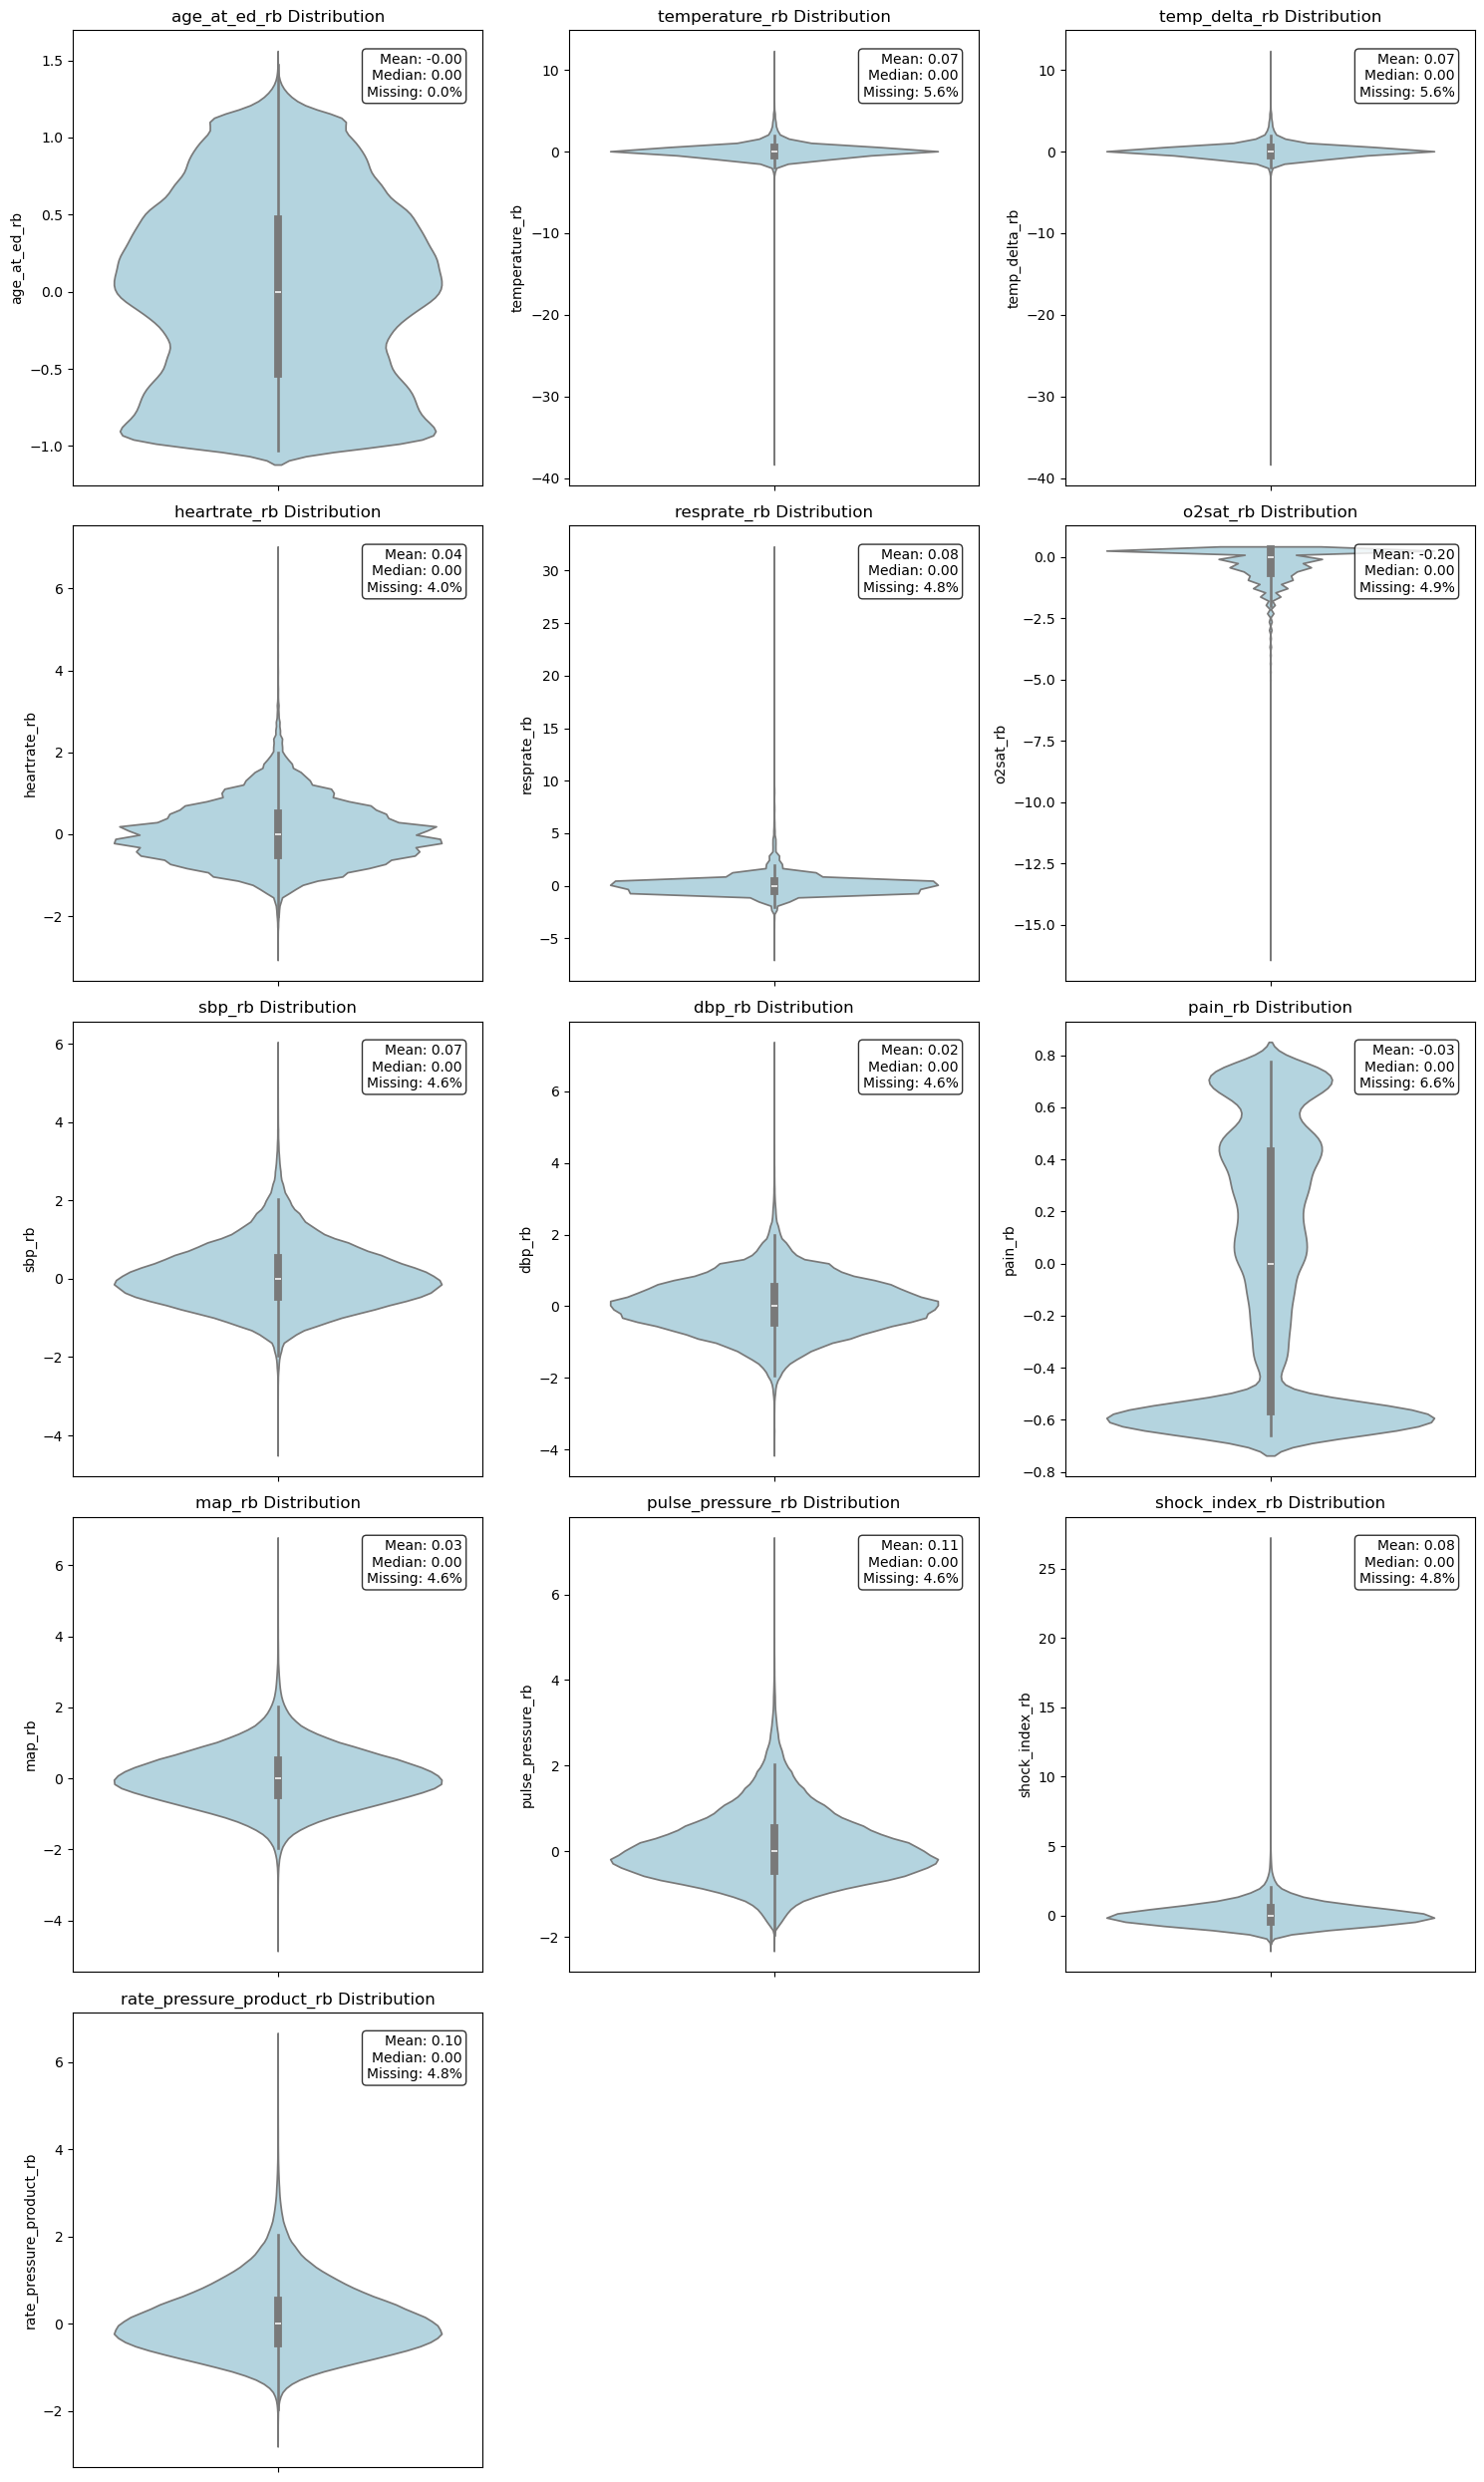

,count,mean,std,min,25%,50%,75%,max,null_ratio
subject_id,425087.0,15008713.591347,2878486.35271,10000032.0,12517890.5,15016278.0,17499003.5,19999987.0,0.000000
stay_id,425087.0,34997352.518205,2888341.541656,30000012.0,32497991.5,34993947.0,37503868.5,39999965.0,0.000000
age_at_ed,425087.0,52.862845,20.619338,18.0,35.0,53.0,69.0,103.0,0.000000
hour,425087.0,13.478267,5.890293,0.0,10.0,14.0,18.0,23.0,0.000000
minute,425087.0,29.415837,17.301001,0.0,14.0,29.0,44.0,59.0,0.000000
temperature,401186.0,98.082329,1.009903,56.0,97.5,98.0,98.6,111.4,0.056226
heartrate,407980.0,85.06642,17.66277,13.0,72.0,84.0,96.0,250.0,0.040244
resprate,404709.0,17.545555,2.427589,0.011536,16.055544,17.353365,18.563782,97.983328,0.047938
o2sat,404352.0,98.395221,2.061225,50.0,97.0,99.0,100.0,100.0,0.048778
sbp,405409.0,134.985304,22.293406,10.0,120.0,133.0,148.0,299.0,0.046292


In [37]:
explorer.plot_features_distribution(robust_gmm_data, robust_gmm_features)

robust_gmm_summary = robust_gmm_data.describe().T
robust_gmm_summary['null_ratio'] = robust_gmm_data.isnull().sum() / len(robust_gmm_data)
robust_gmm_summary



## Data Split and Export

In [44]:
from sklearn.model_selection import train_test_split

# Split the cleaned data into training and validation sets
train_data, val_data = train_test_split(
    cleaned_data,
    test_size=0.2, 
    random_state=42)

# Apply aggressive transformations to the training data
aggressive_transformer = DataTransformer(train_data)
train_data_aggressive_transformed, _ = aggressive_transformer.aggressive_transformer_fit()

# Apply robust transformations to the training data
robust_trainer = DataTransformer(train_data)
train_data_robust_transformed, _ = robust_trainer.robust_transformer_fit()


In [47]:

# export the raw  ed_data
ed_data.to_csv('../data/cached/ed_data.csv', index=False)

# export the cleaned untransformed data
cleaned_data.to_csv('../data/cached/cleaned_data.csv', index=False)

# Export the training and validation sets
train_data.to_csv('../data/cached/train_data.csv', index=False)
val_data.to_csv('../data/cached/validation_data.csv', index=False)

# Export the data with aggressive transformations
train_data_aggressive_transformed.to_csv('../data/cached/train_data_aggressive_transformed.csv', index=False)
train_data_robust_transformed.to_csv('../data/cached/train_data_robust_transformed.csv', index=False)
